In [3]:
import pandas as pd
import numpy as np
import datetime as dt
import statistics as st
import matplotlib.pyplot as plt
from matplotlib import style
import pandas_datareader.data as web
import seaborn as sns
style.use('seaborn-dark-palette')

In [5]:
df = pd.read_csv(
    'fang_example.csv', 
    parse_dates = True, 
    index_col = 1, 
    na_values = ["", "C"]
)
df.head()

,PERMNO,TICKER,COMNAM,RET
date,,,,
2012-04-30,13407,NaN,NaN,NaN
2012-05-31,13407,FB,FACEBOOK INC,NaN
2012-06-29,13407,FB,FACEBOOK INC,0.050507
2012-07-31,13407,FB,FACEBOOK INC,-0.301817
2012-08-31,13407,FB,FACEBOOK INC,-0.168217


Text(0.5, 1.0, 'Boxplot of returns')

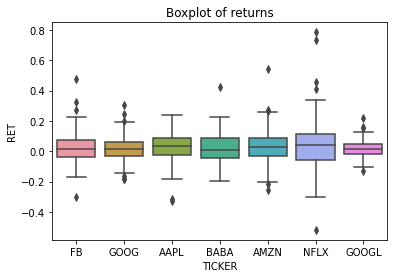

In [6]:
sns.boxplot(x="TICKER", y = "RET", data=df).set_title("Boxplot of returns")

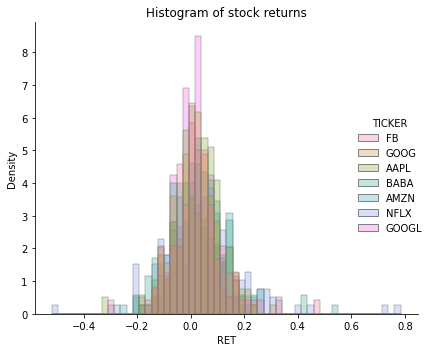

In [12]:
sns.displot(
    df,
    x="RET",
    hue ="TICKER", 
    edgecolor = "grey",
    stat = "density", 
    alpha = .3, 
    common_norm=False
).set(title = "Histogram of stock returns")

plt.tight_layout()
plt.show()

In [13]:
df2 = pd.pivot_table(
    df,
    index = "date",
    columns = "TICKER",
    values = "RET")
df2.head()

TICKER,AAPL,AMZN,BABA,FB,GOOG,GOOGL,NFLX
date,,,,,,,
2007-01-31,0.010490,-0.045362,NaN,NaN,0.089081,NaN,-0.117943
2007-02-28,-0.013064,0.039023,NaN,NaN,-0.103789,NaN,-0.012275
2007-03-30,0.098097,0.016607,NaN,NaN,0.019379,NaN,0.029294
2007-04-30,0.074158,0.541342,NaN,NaN,0.028855,NaN,-0.043984
2007-05-31,0.214339,0.127344,NaN,NaN,0.056279,NaN,-0.012183


In [15]:
df2.describe()

TICKER,AAPL,AMZN,BABA,FB,GOOG,GOOGL,NFLX
count,168.000000,168.000000,75.000000,103.000000,167.000000,81.000000,168.000000
mean,0.027873,0.031274,0.018169,0.026869,0.015578,0.016078,0.041701
std,0.091203,0.099426,0.105445,0.103977,0.078399,0.062129,0.157950
min,-0.329558,-0.254018,-0.195667,-0.301817,-0.184773,-0.132388,-0.518021
25%,-0.021505,-0.033509,-0.046167,-0.039503,-0.028096,-0.020068,-0.055489
50%,0.033247,0.026204,0.011091,0.017589,0.015426,0.012984,0.039066
75%,0.084987,0.085035,0.087391,0.076308,0.060926,0.049293,0.116847
max,0.237701,0.541342,0.421570,0.479100,0.303812,0.217502,0.784642


In [16]:
df2.to_csv('new.csv')

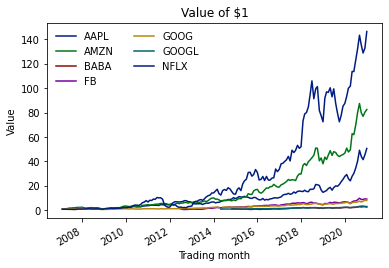

In [18]:
df3 = df2 +1
df4 = df3.cumprod(axis=0, skipna = True)

df4.plot()
plt.title("Value of $1")
plt.xlabel("Trading month")
plt.ylabel("Value")
plt.legend(loc="best",ncol=2, frameon=False)
plt.show()

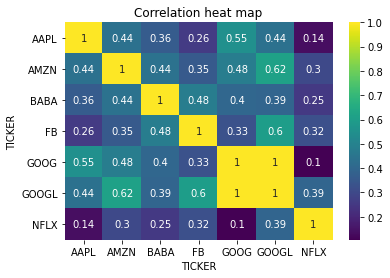

In [22]:
corr=df2.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,
           annot=True, cmap = "viridis")
plt.title("Correlation heat map")
plt.show()

In [23]:
len([1,2,3])

3